##Preliminaries

In [1]:
import numpy as np
import pandas as pd
import graphviz as gr

In [2]:
def same(x):
    return x
    
def cube(x):
    return np.power(x, 3)

def negexp(x):
    return np.exp(-np.abs(x))

## **An example**

For example, Jérolon et al. considered the amount of causal effect of hormone replacement therapy (HRT) on breast cancer (BC) risk. In this applicative context, the age (A) is a covariable.

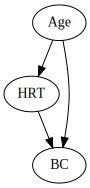

In [ ]:
g = gr.Digraph()
g.edge("HRT", "BC"), g.edge("Age","HRT"), g.edge("Age", "BC")
g

Ref : Jérolon A, Baglietto L, Birmelé E, Alarcon F, Perduca V. Causal mediation analysis in presence of multiple mediators uncausally related. The International Journal of Biostatistics. 2021 Nov 1;17(2):191-221.

##Simulation of an example

We simulate an example
$$T=f_1(a_1\cdot X+\varepsilon_1)$$
$$Y=f_2(a_2\cdot T+ b_2\cdot X+\varepsilon_2)$$
where $X,\varepsilon_1,\varepsilon_2$ are independent random variables whose distribution is known

In [13]:
def generate_samples(size,fixed_function1,fixed_function2, dist_x,dx,a1,a2,b2,nstd,seed = None,normalize=True):
    '''Generate independent post-nonlinear samples
    Arguments:
        size : number of samples
        f1, f2 to be within {x,x^2,x^3,tanh x, e^{-|x|}, cos x}
    Output:
        Samples X,T,Y
    '''
    if seed == None:
        np.random.seed()
    else:
        np.random.seed(seed)

    if fixed_function1 == 'linear':
      f1 = same
    elif fixed_function1=='carre':
      f1 = np.square
    elif fixed_function1=='cube':
      f1 = cube
    elif fixed_function1=='negexp':
      f1 = negexp
    else:
      f1 = np.cos

    if fixed_function2 == 'linear':
      f2= same
    elif fixed_function2=='carre':
      f2 = np.square
    elif fixed_function2=='cube':
      f2 = cube
    elif fixed_function2=='negexp':
      f2 = negexp
    else:
      f2 = np.cos
    
    if dist_x =='gaussian':
        cov = np.eye(dx)
        mu = np.ones(dx)
        X = np.random.multivariate_normal(mu, cov, size)

    elif dist_x == 'laplace':
        X = np.random.laplace(loc=0.0, scale=1.0, size=size*dx)
        if (dx!=1):
          X = np.reshape(X,(size,dx))

    T = f1(np.dot(a1,X)+nstd * np.random.normal(0, 1, size))
    Y = f2(np.dot(a2,T)+b2*X+nstd * np.random.normal(0, 1, size))

    if normalize == True:
        X = (X - X.min()) / (X.max() - X.min())
        T = (T - T.min()) / (T.max() - T.min())
        Y = (Y - Y.min()) / (Y.max() - Y.min())

    return [X,T,Y]

In [14]:
[X,T,Y]=generate_samples(100,'cube','carre', 'gaussian',1,1.0,2.0,1.0,1.0,43)
df_mediator=pd.DataFrame({'X':X[:,0],'T':T[:,0],'Y':Y[:,0]})
df_mediator

,X,T,Y
0,0.534263,0.260569,0.000540
1,0.263968,0.249165,0.000028
2,0.386837,0.251142,0.000085
3,0.350574,0.250173,0.000057
4,0.673522,0.281381,0.002728
...,...,...,...
95,0.423019,0.252553,0.000132
96,0.497060,0.257181,0.000337
97,0.430913,0.252929,0.000145
98,0.843581,0.329592,0.013870


##Simulation of an intervention

In [16]:
def generate_samples_intervene(size,fixed_function1,fixed_function2, value_t,dist_x,dx,a1,a2,b2,nstd,seed = None,normalize=True):
    '''Generate independent post-nonlinear samples
    Arguments:
        size : number of samples
        f1, f2 to be within {x,x^2,x^3,tanh x, e^{-|x|}, cos x}
    Output:
        Samples T, M,Y
    '''
    print(seed)
    if seed == None:
        np.random.seed()
    else:
        np.random.seed(seed)

    if fixed_function1 == 'linear':
      f1 = same
    elif fixed_function1=='carre':
      f1 = np.square
    elif fixed_function1=='cube':
      f1 = cube
    elif fixed_function1=='negexp':
      f1 = negexp
    else:
      f1 = np.cos

    if fixed_function2 == 'linear':
      f2= same
    elif fixed_function2=='carre':
      f2 = np.square
    elif fixed_function2=='cube':
      f2 = cube
    elif fixed_function2=='negexp':
      f2 = negexp
    else:
      f2 = np.cos
    
    if dist_x =='gaussian':
        cov = np.eye(dx)
        mu = np.ones(dx)
        X = np.random.multivariate_normal(mu, cov, size)

    elif dist_x == 'laplace':
        X = np.random.laplace(loc=0.0, scale=1.0, size=size*dx)
        if (dx!=1):
          X = np.reshape(X,(size,dx))


    Y = f2(np.dot(a2,value_t)+b2*X+nstd * np.random.normal(0, 1, size))

    if normalize == True:
        X = (X - X.min()) / (X.max() - X.min())
        T =value_t*np.ones((len(X),1))
        Y = (Y - Y.min()) / (Y.max() - Y.min())

    return [X,T,Y]

We intervene on $M$ setting $M:=3$

In [17]:
[X,T,Y]=generate_samples_intervene(100,'cube','carre', 3.0,'gaussian',1,1,2,1,1,43)
df_intervene=pd.DataFrame({'X':X[:,0],'T':T[:,0],'Y':Y[:,0]})
df_intervene

43


,X,T,Y
0,0.534263,3.0,0.377819
1,0.263968,3.0,0.261186
2,0.386837,3.0,0.311753
3,0.350574,3.0,0.296404
4,0.673522,3.0,0.445627
...,...,...,...
95,0.423019,3.0,0.327423
96,0.497060,3.0,0.360593
97,0.430913,3.0,0.330889
98,0.843581,3.0,0.535549


##Counterfactuals

We assume now that we have observed $(X,T,Y)=(1,-1,1)$ with $f_1=f_2:=t\mapsto t$, $a_1=a_2=b_2=1$.

What are the value of the two noises $\varepsilon_1,\varepsilon_2$?

What would have happen if $T:=2$?